# Notebook Containing Neural Networks

This notebook has the modeling done for neural networks. Neural networks generate a lot of content and would make the main notebook less readable.

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras import callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Load X_train, X_test, y_train, and y_test


with open('X_train.pickle', 'rb') as xtr:
    X_train = pickle.load(xtr)
    
with open('X_test.pickle', 'rb') as xtst:
    X_test = pickle.load(xtst)
    
with open('y_train.pickle', 'rb') as ytr:
    y_train = pickle.load(ytr)
    
with open('y_test.pickle', 'rb') as ytst:
    y_test = pickle.load(ytst)

##  Neural Network 1 
### Architecture
* 2 dense layers
 * 12 neurons in the first dense layer
 * 8 neurons in the second dense layer
* relu activation
* Use sigmoid curve

In [34]:
# Instantiate the model

nn_model1 = Sequential()

In [35]:
# set input_dim to shape of dataframe

num_features = X_train.shape[1]

num_features

24

In [36]:
# 1st layer: input_dim=8, 12 nodes, RELU
nn_model1.add(Dense(12, input_dim=num_features, activation='relu'))
# 2nd layer: 8 nodes, RELU
nn_model1.add(Dense(8, activation='relu'))
# output layer: dim=1, activation sigmoid
nn_model1.add(Dense(1, activation='sigmoid' ))

# Compile the model
nn_model1.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

In [37]:
history1 = nn_model1.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=16)

Epoch 1/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5315 - accuracy: 0.7340 - val_loss: 0.5127 - val_accuracy: 0.7518
Epoch 2/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5108 - accuracy: 0.7490 - val_loss: 0.5090 - val_accuracy: 0.7516
Epoch 3/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5081 - accuracy: 0.7498 - val_loss: 0.5079 - val_accuracy: 0.7527
Epoch 4/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5062 - accuracy: 0.7503 - val_loss: 0.5063 - val_accuracy: 0.7533
Epoch 5/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5043 - accuracy: 0.7512 - val_loss: 0.5064 - val_accuracy: 0.7534
Epoch 6/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5026 - accuracy: 0.7519 - val_loss: 0.5067 - val_accuracy: 0.7531
Epoch 7/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5020 - accuracy: 0.7532 - val_loss: 0.5061 - val_accuracy:

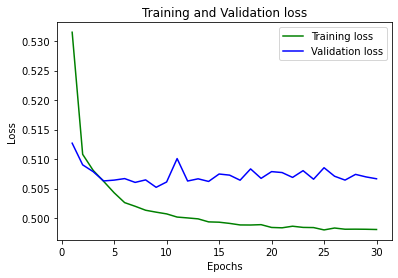

In [38]:
model_1_val_dict = history1.history
loss_values1 = model_1_val_dict["loss"]
val_loss_values1 = model_1_val_dict["val_loss"]

epochs = range(1,len(loss_values1) + 1)
plt.plot(epochs, loss_values1, "g", label="Training loss")
plt.plot(epochs, val_loss_values1, "blue", label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

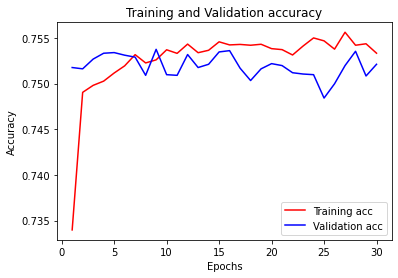

In [39]:
acc_values1 = model_1_val_dict["accuracy"]
val_acc_values1 = model_1_val_dict["val_accuracy"]

plt.plot(epochs, acc_values1, "r", label="Training acc")
plt.plot(epochs, val_acc_values1, "blue", label="Validation acc")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Achieved an accuracy of 75% on the testing data set which is similar to the ensemble methods covered in the main notebook. Let's increase the layers neurons and add early stoppage since the validation accuracy decreased towards the end of the epochs.

The validation accuracy somewhat remained constant throughout the number of epochs. Increasing the number of epochs may not help the next iteration.

##  Neural Network 2
### Architecture
* 3 dense layers
 * 40 neurons in the first layer
 * 20 neurons in the second
 * 10 neurons in the third
* relu activation
* Use sigmoid curve
* Early Stopping

In [40]:
# Instantiate the model

nn_model2 = Sequential()

In [41]:
# 1st layer: input_dim=8, 40 nodes, RELU
nn_model2.add(Dense(40, input_dim=num_features, activation='relu'))
# 2nd layer: 20 nodes, RELU
nn_model2.add(Dense(20, activation='relu'))
# 3rd layer: 
nn_model2.add(Dense(10, activation='relu'))

# output layer: dim=1, activation sigmoid
nn_model2.add(Dense(1, activation='sigmoid' ))

#  early stopping - monitor for validation loss. Wait for 5 epochs if loss increases. Allow for 1% error
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5,min_delta=1),
                   ModelCheckpoint(filepath='Neural_Network', monitor='val_loss',
                                  save_best_only=True)]

# Compile the model
nn_model2.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
history2 = nn_model2.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=16,
                       callbacks=es)

Epoch 1/30
3513/3513 [==============================] - 7s 2ms/step - loss: 0.5168 - accuracy: 0.7437 - val_loss: 0.5079 - val_accuracy: 0.7518
Epoch 2/30
3513/3513 [==============================] - 5s 1ms/step - loss: 0.5047 - accuracy: 0.7506 - val_loss: 0.5071 - val_accuracy: 0.7510
Epoch 3/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5017 - accuracy: 0.7532 - val_loss: 0.5074 - val_accuracy: 0.7525
Epoch 4/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.5000 - accuracy: 0.7530 - val_loss: 0.5070 - val_accuracy: 0.7528
Epoch 5/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.4990 - accuracy: 0.7542 - val_loss: 0.5103 - val_accuracy: 0.7510
Epoch 6/30
3513/3513 [==============================] - 4s 1ms/step - loss: 0.4975 - accuracy: 0.7561 - val_loss: 0.5095 - val_accuracy: 0.7503
Epoch 00006: early stopping


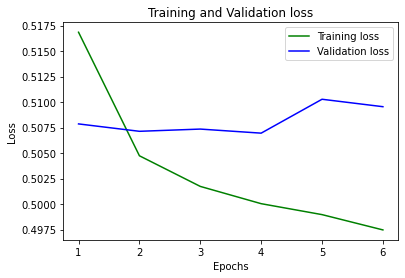

In [43]:
model_2_val_dict = history2.history
loss_values2 = model_2_val_dict["loss"]
val_loss_values2 = model_2_val_dict["val_loss"]

epochs = range(1,len(loss_values2) + 1)
plt.plot(epochs, loss_values2, "g", label="Training loss")
plt.plot(epochs, val_loss_values2, "blue", label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

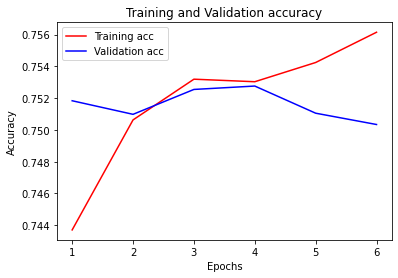

In [44]:
acc_values2 = model_2_val_dict["accuracy"]
val_acc_values2 = model_2_val_dict["val_accuracy"]

plt.plot(epochs, acc_values2, "r", label="Training acc")
plt.plot(epochs, val_acc_values2, "blue", label="Validation acc")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Increasing the number of layers, and adding significantly more neurons over 3 times, did not improve the model accuracy. The early stopping parameter helped in stoping the model early on when it was not gaining accuracy. Similarly to the first iteration, the accuracy remained constant across the epochs. 

This appears to be the best we can do with neural networks. We will use the saved model to compare its results to the ensemble models explored previously.